To implement the perceptron algorithm, we will import the class Perceptron which I created in my source code `perceptron.py`, whose primary method is `Perceptron.fit(X, y)`. $\textbf{X} \in \mathbb{R}^{n\times p}$ is a matrix of predictor variables, with $n$ observations and $p$ features, and $\textbf{y} \in {0, 1}^n$ is a vector of binary labels. When the method `Perceptron.fit(X, y)` is called, the perceptron in question will get an instance variable of weights called `w`, and a history of the perceptron's accuracy scores during the runtime of the function, called `history`.

Before updating the perceptron's weight, we rewrite the problem with $\tilde{\textbf{X}} = [ \textbf{X}, \textbf{1} ]$ and $ \tilde{\textbf{w}} = (\textbf{w}, 1)$ to account for the bias. The perceptron algorithm is implemented as follows:

1. We start by assigning a random weight vector $\tilde{\textbf{w}}^{(0)}$.
2. Until the perceptron achieves perfect accuracy (or until termination), in each time step t:
    - Pick a random point index $i$ in $\textbf{y}$
    - Update the weight:
$$\tilde{\textbf{w}}^{(t+1)} = \tilde{\textbf{w}}^{(t)} + \mathbb{1}(\tilde{y}_i \langle \tilde{\textbf{w}}^{(t)}, \tilde{x}_i \rangle < 0) \tilde{y}_i \tilde{x}_i,$$
where $\tilde{y}_i = 2y_i -1$, which takes on values of -1 and 1 instead of 0 and 1. The Boolean function in this equation checks whether or not the weight needs an update. It does not update when $\tilde{y}_i \langle \tilde{\textbf{w}}^{(t)}, \tilde{x}_i \rangle \geq 0$, which means that the prediction value matches the real value.

We will use this algorithm to conduct a few experiments, and confirm that if a set of data is linearly separable, this algorithm will separate the data.

# Experiment 1



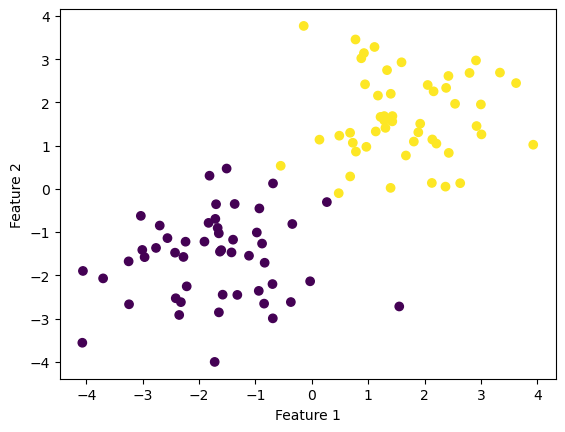

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

np.random.seed(12345)

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In this experiment, our data have 2 features, and we can see that they are linearly separable. First, we import the Perceptron class from the code that I wrote. After calling the `Perceptron.fit(X, y)` method, we will find a weight vector $\tilde{\textbf{w}}$ that describes the separating line.

In [69]:
from perceptron import Perceptron

In [70]:
p = Perceptron()
p.fit(X, y, max_steps = 1000)

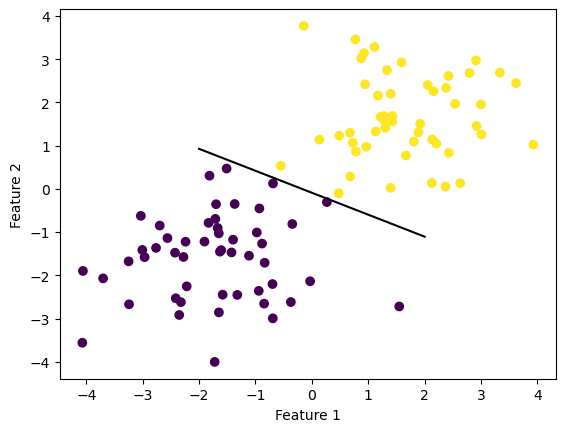

In [71]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")



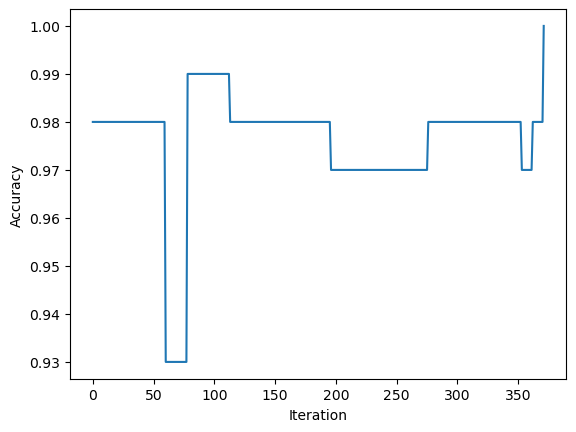

In [72]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

Given this set of linearly separable data, over time, our perceptron was able to separate the data with 100% accuracy. This was achieved within under 200 time steps.

# Experiment 2

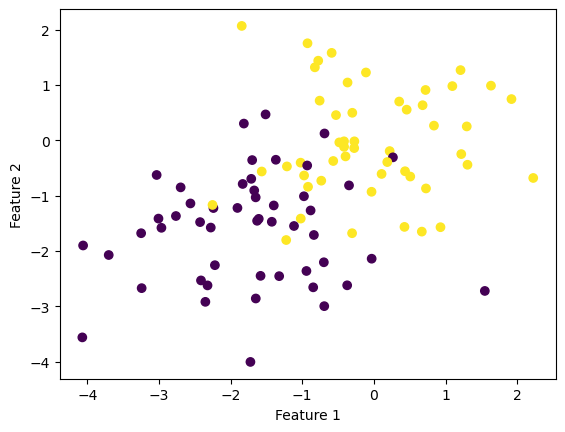

In [73]:
np.random.seed(12345)

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (0,0)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In this experiment, the data overlap each other, which makes them linearly inseparable. If we implement the perceptron algorithm in this case, the method `Perceptron.fit(X, y)` until it terminates, but its accuracy will never achieve 100%.

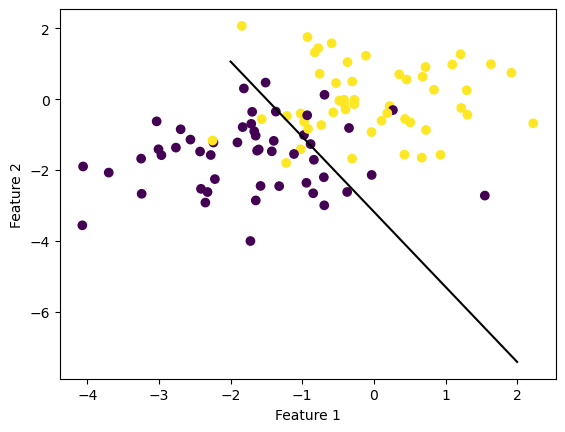

In [74]:
p = Perceptron()
p.fit(X, y, max_steps = 1000)

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

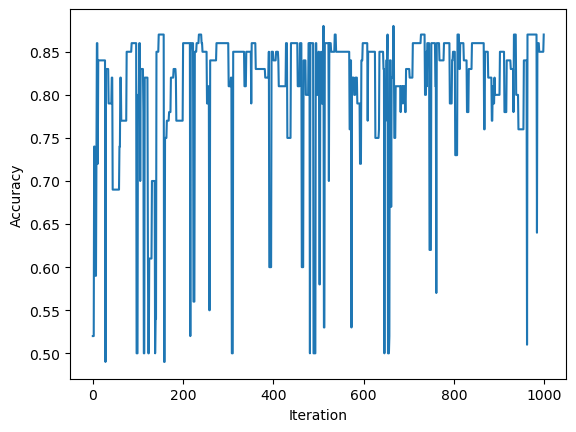

In [75]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

Because the perceptron algorithm never reached an accuracy of 100%, it was iterated 1000 times until it terminated. This is one of the limitations of the perceptron algorithm.

# Experiment 3

In [76]:
np.random.seed(12345)

n = 100
p_features = 8

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = 7)

In this case, we consider 7 features. Because the data set is no longer 2-dimensional, visualization is not possible. There are 7 centers spread randomly in the $\mathbb{R}^7$ space, each of which is surrounded by a cluster of one feature.

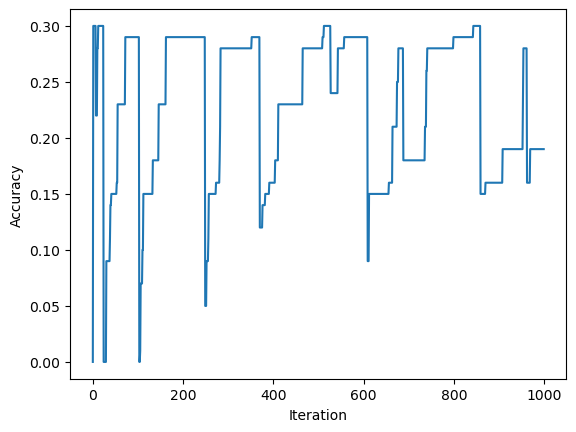

In [77]:
p = Perceptron()
p.fit(X, y, max_steps = 1000)
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

The history of this perceptron indicates that this data set is not linearly separable because the accuracy of the perceptron never reaches 100%, and the algorithm runs for too long.

# Runtime Complexity

We are concerned with the runtime complexity of a single iteration of the perceptron algorithm update. We assume that the relevant operations are addition and multiplication. According to the update function, the operation that takes up the most time is the dot product between $\tilde{\textbf{w}}$ and $\tilde{\textbf{x}}_i$. Each of these terms has length $p+1$ ($p$ is the number of features). This is a sum of $p+1$ products, which means that this update function has a time complexity of $\mathcal{O}(p)$. This depends only on the number of features, and not the number of data points.